In [8]:
import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame

import images
import subprocess

In [31]:
catalogs = []
catalog_tag = '/e/ocean1/users/vargatn/DES/SIM_DATA/SKY_MODEL_EPSILON/res_clust_v2_z0l0/epsilon_clust_v8-z0l0_15000_{:03d}.fits'
for i in np.arange(100):
    fname = catalog_tag.format(i)
    data = fio.read(fname)
    catalog_cluster = data[data['LOC'] == 1]
    catalog_field = data[data['LOC'] == 0]
    catalog = np.hstack((catalog_cluster, catalog_field))
    catalog['G1'] = 0.3
    catalog['G2'] = -0.2
    catalogs.append(catalog)
#     print(fname)

In [32]:
catalog = catalogs[0]

In [33]:
fr = frame.Frame(catalog, name='canvas_000', noise_std=2)
fr.render()
fr.extract()

starting xshear calculations in 100 processes


In [37]:
fr.ksb()

0 [2510.7283  223.3498] 5.0
galsim.BoundsI(2506,2515,218,227) galsim.BoundsI(1,5000,1,5000)
1 [2473.5857   221.40419] 7.0
galsim.BoundsI(2467,2480,214,227) galsim.BoundsI(1,5000,1,5000)
2 [2517.806    238.36504] 5.0
galsim.BoundsI(2513,2522,233,242) galsim.BoundsI(1,5000,1,5000)
3 [2549.195    224.49023] 5.0
galsim.BoundsI(2544,2553,219,228) galsim.BoundsI(1,5000,1,5000)
4 [2353.0105   237.57683] 10.0
galsim.BoundsI(2343,2362,228,247) galsim.BoundsI(1,5000,1,5000)
5 [2589.8328   228.25066] 6.0
galsim.BoundsI(2584,2595,222,233) galsim.BoundsI(1,5000,1,5000)
6 [2369.582    228.69472] 6.0
galsim.BoundsI(2364,2375,223,234) galsim.BoundsI(1,5000,1,5000)
7 [2264.0442   242.23947] 5.0
galsim.BoundsI(2259,2268,237,246) galsim.BoundsI(1,5000,1,5000)
8 [2468.1812   231.63493] 9.0
galsim.BoundsI(2459,2476,223,240) galsim.BoundsI(1,5000,1,5000)
9 [2428.2097   237.39622] 5.0
galsim.BoundsI(2423,2432,232,241) galsim.BoundsI(1,5000,1,5000)
10 [2432.7942   246.59218] 5.0
galsim.BoundsI(2428,2437,242,2

223 [3054.1396   472.10907] 9.0
galsim.BoundsI(3045,3062,463,480) galsim.BoundsI(1,5000,1,5000)
224 [2590.118    461.98798] 6.0
galsim.BoundsI(2584,2595,456,467) galsim.BoundsI(1,5000,1,5000)
225 [3517.3667  462.8771] 5.0
galsim.BoundsI(3512,3521,458,467) galsim.BoundsI(1,5000,1,5000)
226 [1902.0966  455.3617] 8.0
galsim.BoundsI(1894,1909,447,462) galsim.BoundsI(1,5000,1,5000)
227 [2414.7651   468.71307] 6.0
galsim.BoundsI(2409,2420,463,474) galsim.BoundsI(1,5000,1,5000)
228 [2135.7356   463.92468] 5.0
galsim.BoundsI(2131,2140,459,468) galsim.BoundsI(1,5000,1,5000)
229 [2147.3257   464.87982] 5.0
galsim.BoundsI(2142,2151,460,469) galsim.BoundsI(1,5000,1,5000)
230 [3295.4019   459.93503] 5.0
galsim.BoundsI(3290,3299,455,464) galsim.BoundsI(1,5000,1,5000)
231 [3509.3374   478.60156] 13.0
galsim.BoundsI(3496,3521,466,491) galsim.BoundsI(1,5000,1,5000)
232 [2007.8739   463.46887] 6.0
galsim.BoundsI(2002,2013,457,468) galsim.BoundsI(1,5000,1,5000)
233 [3061.542   469.6194] 6.0
galsim.Bounds

639 [1373.3545  720.4774] 8.0
galsim.BoundsI(1365,1380,712,727) galsim.BoundsI(1,5000,1,5000)
640 [1300.8539  729.5257] 5.0
galsim.BoundsI(1296,1305,725,734) galsim.BoundsI(1,5000,1,5000)
641 [3085.2722  730.6421] 7.0
galsim.BoundsI(3078,3091,724,737) galsim.BoundsI(1,5000,1,5000)
642 [3469.186   727.5697] 6.0
galsim.BoundsI(3463,3474,722,733) galsim.BoundsI(1,5000,1,5000)
643 [3333.5183  728.1042] 5.0
galsim.BoundsI(3329,3338,723,732) galsim.BoundsI(1,5000,1,5000)
644 [2213.2588   725.78906] 7.0
galsim.BoundsI(2206,2219,719,732) galsim.BoundsI(1,5000,1,5000)
645 [2953.3738   723.05597] 5.0
galsim.BoundsI(2948,2957,718,727) galsim.BoundsI(1,5000,1,5000)
646 [1453.4352  723.1594] 6.0
galsim.BoundsI(1447,1458,717,728) galsim.BoundsI(1,5000,1,5000)
647 [2512.111   741.6057] 10.0
galsim.BoundsI(2502,2521,732,751) galsim.BoundsI(1,5000,1,5000)
648 [1790.5674   734.14813] 5.0
galsim.BoundsI(1786,1795,729,738) galsim.BoundsI(1,5000,1,5000)
649 [1889.2438   726.32556] 10.0
galsim.BoundsI(1879,

1056 [2086.7393   929.85986] 5.0
galsim.BoundsI(2082,2091,925,934) galsim.BoundsI(1,5000,1,5000)
1057 [2646.861  936.301] 6.0
galsim.BoundsI(2641,2652,930,941) galsim.BoundsI(1,5000,1,5000)
1058 [2959.4878   944.47363] 5.0
galsim.BoundsI(2954,2963,939,948) galsim.BoundsI(1,5000,1,5000)
1059 [2843.0134   939.17773] 7.0
galsim.BoundsI(2836,2849,932,945) galsim.BoundsI(1,5000,1,5000)
1060 [2103.6604   946.58307] 11.0
galsim.BoundsI(2093,2114,936,957) galsim.BoundsI(1,5000,1,5000)
1061 [1017.9449  941.4543] 5.0
galsim.BoundsI(1013,1022,936,945) galsim.BoundsI(1,5000,1,5000)
1062 [2459.5986   936.61163] 7.0
galsim.BoundsI(2453,2466,930,943) galsim.BoundsI(1,5000,1,5000)
1063 [862.9592 936.6742] 5.0
galsim.BoundsI(858,867,932,941) galsim.BoundsI(1,5000,1,5000)
1064 [3026.3486  935.0781] 5.0
galsim.BoundsI(3021,3030,930,939) galsim.BoundsI(1,5000,1,5000)
1065 [1521.3762  952.6347] 10.0
galsim.BoundsI(1511,1530,943,962) galsim.BoundsI(1,5000,1,5000)
1066 [1187.9442  949.3058] 10.0
galsim.Bound

1465 [1501.5114 1113.9724] 6.0
galsim.BoundsI(1496,1507,1108,1119) galsim.BoundsI(1,5000,1,5000)
1466 [3844.1753 1111.6519] 7.0
galsim.BoundsI(3837,3850,1105,1118) galsim.BoundsI(1,5000,1,5000)
1467 [3135.6467 1111.5535] 6.0
galsim.BoundsI(3130,3141,1106,1117) galsim.BoundsI(1,5000,1,5000)
1468 [3930.7402 1128.4822] 8.0
galsim.BoundsI(3923,3938,1120,1135) galsim.BoundsI(1,5000,1,5000)
1469 [3955.003  1119.1005] 7.0
galsim.BoundsI(3948,3961,1112,1125) galsim.BoundsI(1,5000,1,5000)
1470 [3742.3784 1118.9211] 7.0
galsim.BoundsI(3735,3748,1112,1125) galsim.BoundsI(1,5000,1,5000)
1471 [2234.6826 1112.8792] 6.0
galsim.BoundsI(2229,2240,1107,1118) galsim.BoundsI(1,5000,1,5000)
1472 [2698.0366 1110.9008] 8.0
galsim.BoundsI(2690,2705,1103,1118) galsim.BoundsI(1,5000,1,5000)
1473 [4201.374  1119.9331] 5.0
galsim.BoundsI(4196,4205,1115,1124) galsim.BoundsI(1,5000,1,5000)
1474 [2886.3652 1116.9774] 5.0
galsim.BoundsI(2881,2890,1112,1121) galsim.BoundsI(1,5000,1,5000)
1475 [2575.5972 1114.4836] 5.0

1879 [2070.758  1293.0978] 5.0
galsim.BoundsI(2066,2075,1288,1297) galsim.BoundsI(1,5000,1,5000)
1880 [2875.2988 1289.3193] 5.0
galsim.BoundsI(2870,2879,1284,1293) galsim.BoundsI(1,5000,1,5000)
1881 [2618.6067 1305.8281] 10.0
galsim.BoundsI(2609,2628,1296,1315) galsim.BoundsI(1,5000,1,5000)
1882 [1201.7347 1309.2047] 9.0
galsim.BoundsI(1193,1210,1300,1317) galsim.BoundsI(1,5000,1,5000)
1883 [1229.0094 1291.3975] 5.0
galsim.BoundsI(1224,1233,1286,1295) galsim.BoundsI(1,5000,1,5000)
1884 [3281.6013 1291.0319] 8.0
galsim.BoundsI(3274,3289,1283,1298) galsim.BoundsI(1,5000,1,5000)
1885 [1019.8736 1302.7726] 7.0
galsim.BoundsI(1013,1026,1296,1309) galsim.BoundsI(1,5000,1,5000)
1886 [4070.5962 1292.5178] 6.0
galsim.BoundsI(4065,4076,1287,1298) galsim.BoundsI(1,5000,1,5000)
1887 [ 738.28125 1301.0227 ] 5.0
galsim.BoundsI(733,742,1296,1305) galsim.BoundsI(1,5000,1,5000)
1888 [1347.5316 1306.6599] 6.0
galsim.BoundsI(1342,1353,1301,1312) galsim.BoundsI(1,5000,1,5000)
1889 [4046.037  1294.1564] 5.

2297 [2523.7087 1469.6605] 6.0
galsim.BoundsI(2518,2529,1464,1475) galsim.BoundsI(1,5000,1,5000)
2298 [2124.315  1466.9102] 7.0
galsim.BoundsI(2117,2130,1460,1473) galsim.BoundsI(1,5000,1,5000)
2299 [2862.3398 1464.7789] 7.0
galsim.BoundsI(2855,2868,1458,1471) galsim.BoundsI(1,5000,1,5000)
2300 [1420.0093 1464.6532] 5.0
galsim.BoundsI(1415,1424,1460,1469) galsim.BoundsI(1,5000,1,5000)
2301 [2530.054 1472.566] 5.0
galsim.BoundsI(2525,2534,1468,1477) galsim.BoundsI(1,5000,1,5000)
2302 [1544.9768 1465.5198] 7.0
galsim.BoundsI(1538,1551,1459,1472) galsim.BoundsI(1,5000,1,5000)
2303 [2309.2239 1463.1614] 6.0
galsim.BoundsI(2303,2314,1457,1468) galsim.BoundsI(1,5000,1,5000)
2304 [3778.3374 1470.9363] 7.0
galsim.BoundsI(3771,3784,1464,1477) galsim.BoundsI(1,5000,1,5000)
2305 [3469.0872 1471.757 ] 12.0
galsim.BoundsI(3457,3480,1460,1483) galsim.BoundsI(1,5000,1,5000)
2306 [2720.6045 1464.8329] 7.0
galsim.BoundsI(2714,2727,1458,1471) galsim.BoundsI(1,5000,1,5000)
2307 [2619.9436 1464.6924] 7.0


2720 [1039.4214 1616.9095] 5.0
galsim.BoundsI(1034,1043,1612,1621) galsim.BoundsI(1,5000,1,5000)
2721 [ 728.4582 1636.3339] 7.0
galsim.BoundsI(721,734,1629,1642) galsim.BoundsI(1,5000,1,5000)
2722 [1892.2079 1620.2875] 6.0
galsim.BoundsI(1886,1897,1614,1625) galsim.BoundsI(1,5000,1,5000)
2723 [ 576.3627 1615.1158] 6.0
galsim.BoundsI(570,581,1609,1620) galsim.BoundsI(1,5000,1,5000)
2724 [1876.1301 1618.6392] 6.0
galsim.BoundsI(1870,1881,1613,1624) galsim.BoundsI(1,5000,1,5000)
2725 [3236.15   1625.9044] 9.0
galsim.BoundsI(3227,3244,1617,1634) galsim.BoundsI(1,5000,1,5000)
2726 [4601.801  1620.9447] 6.0
galsim.BoundsI(4596,4607,1615,1626) galsim.BoundsI(1,5000,1,5000)
2727 [ 711.0558 1621.8032] 6.0
galsim.BoundsI(705,716,1616,1627) galsim.BoundsI(1,5000,1,5000)
2728 [4558.3013 1628.3743] 5.0
galsim.BoundsI(4553,4562,1623,1632) galsim.BoundsI(1,5000,1,5000)
2729 [3667.5842 1623.2513] 5.0
galsim.BoundsI(3663,3672,1618,1627) galsim.BoundsI(1,5000,1,5000)
2730 [4479.477 1617.992] 5.0
galsim.

3141 [2404.9636 1766.4932] 6.0
galsim.BoundsI(2399,2410,1760,1771) galsim.BoundsI(1,5000,1,5000)
3142 [2620.0808 1770.9526] 5.0
galsim.BoundsI(2615,2624,1766,1775) galsim.BoundsI(1,5000,1,5000)
3143 [4344.1475 1771.8428] 5.0
galsim.BoundsI(4339,4348,1767,1776) galsim.BoundsI(1,5000,1,5000)
3144 [2598.321  1770.1022] 6.0
galsim.BoundsI(2592,2603,1764,1775) galsim.BoundsI(1,5000,1,5000)
3145 [ 862.48804 1767.4137 ] 6.0
galsim.BoundsI(856,867,1761,1772) galsim.BoundsI(1,5000,1,5000)
3146 [2859.2915 1768.5793] 5.0
galsim.BoundsI(2854,2863,1764,1773) galsim.BoundsI(1,5000,1,5000)
3147 [2807.386 1771.457] 5.0
galsim.BoundsI(2802,2811,1766,1775) galsim.BoundsI(1,5000,1,5000)
3148 [1172.0304 1773.9229] 7.0
galsim.BoundsI(1165,1178,1767,1780) galsim.BoundsI(1,5000,1,5000)
3149 [3387.0403 1770.1768] 5.0
galsim.BoundsI(3382,3391,1765,1774) galsim.BoundsI(1,5000,1,5000)
3150 [ 597.6318 1774.9635] 5.0
galsim.BoundsI(593,602,1770,1779) galsim.BoundsI(1,5000,1,5000)
3151 [1257.7019 1773.4094] 5.0
gal

3562 [4684.683 1925.323] 9.0
galsim.BoundsI(4676,4693,1916,1933) galsim.BoundsI(1,5000,1,5000)
3563 [3946.981  1930.8862] 7.0
galsim.BoundsI(3940,3953,1924,1937) galsim.BoundsI(1,5000,1,5000)
3564 [3085.6875 1937.7848] 8.0
galsim.BoundsI(3078,3093,1930,1945) galsim.BoundsI(1,5000,1,5000)
3565 [1752.2155 1931.6965] 8.0
galsim.BoundsI(1744,1759,1924,1939) galsim.BoundsI(1,5000,1,5000)
3566 [3758.504  1936.2104] 7.0
galsim.BoundsI(3752,3765,1929,1942) galsim.BoundsI(1,5000,1,5000)
3567 [3763.6638 1938.9497] 7.0
galsim.BoundsI(3757,3770,1932,1945) galsim.BoundsI(1,5000,1,5000)
3568 [4530.2373 1941.6344] 6.0
galsim.BoundsI(4524,4535,1936,1947) galsim.BoundsI(1,5000,1,5000)
3569 [3925.9631 1938.6393] 6.0
galsim.BoundsI(3920,3931,1933,1944) galsim.BoundsI(1,5000,1,5000)
3570 [1234.4279 1933.8678] 9.0
galsim.BoundsI(1225,1242,1925,1942) galsim.BoundsI(1,5000,1,5000)
3571 [4353.7783 1938.0929] 6.0
galsim.BoundsI(4348,4359,1932,1943) galsim.BoundsI(1,5000,1,5000)
3572 [1471.4517 1938.2628] 6.0
g

3979 [1972.06   2087.0212] 5.0
galsim.BoundsI(1967,1976,2082,2091) galsim.BoundsI(1,5000,1,5000)
3980 [1273.2528 2080.0984] 6.0
galsim.BoundsI(1267,1278,2074,2085) galsim.BoundsI(1,5000,1,5000)
3981 [4737.6543 2085.5422] 8.0
galsim.BoundsI(4730,4745,2078,2093) galsim.BoundsI(1,5000,1,5000)
3982 [1845.9834 2066.2705] 5.0
galsim.BoundsI(1841,1850,2061,2070) galsim.BoundsI(1,5000,1,5000)
3983 [3430.5024 2061.6016] 6.0
galsim.BoundsI(3425,3436,2056,2067) galsim.BoundsI(1,5000,1,5000)
3984 [2687.6353 2081.6917] 7.0
galsim.BoundsI(2681,2694,2075,2088) galsim.BoundsI(1,5000,1,5000)
3985 [3671.6482 2084.0803] 5.0
galsim.BoundsI(3667,3676,2079,2088) galsim.BoundsI(1,5000,1,5000)
3986 [2456.8455 2073.6626] 5.0
galsim.BoundsI(2452,2461,2069,2078) galsim.BoundsI(1,5000,1,5000)
3987 [4546.525 2083.82 ] 7.0
galsim.BoundsI(4540,4553,2077,2090) galsim.BoundsI(1,5000,1,5000)
3988 [3932.429  2065.4082] 5.0
galsim.BoundsI(3927,3936,2060,2069) galsim.BoundsI(1,5000,1,5000)
3989 [3559.3525 2087.7659] 7.0
g

4400 [1700.5094 2220.773 ] 5.0
galsim.BoundsI(1696,1705,2216,2225) galsim.BoundsI(1,5000,1,5000)
4401 [1786.7958 2220.162 ] 8.0
galsim.BoundsI(1779,1794,2212,2227) galsim.BoundsI(1,5000,1,5000)
4402 [ 628.1552 2223.0896] 8.0
galsim.BoundsI(620,635,2215,2230) galsim.BoundsI(1,5000,1,5000)
4403 [4007.0076 2226.4988] 5.0
galsim.BoundsI(4002,4011,2221,2230) galsim.BoundsI(1,5000,1,5000)
4404 [3050.5737 2221.184 ] 5.0
galsim.BoundsI(3046,3055,2216,2225) galsim.BoundsI(1,5000,1,5000)
4405 [2840.7085 2216.7544] 5.0
galsim.BoundsI(2836,2845,2212,2221) galsim.BoundsI(1,5000,1,5000)
4406 [2894.4033 2216.38  ] 10.0
galsim.BoundsI(2884,2903,2206,2225) galsim.BoundsI(1,5000,1,5000)
4407 [ 799.87555 2221.5186 ] 5.0
galsim.BoundsI(795,804,2217,2226) galsim.BoundsI(1,5000,1,5000)
4408 [2586.354  2212.8914] 8.0
galsim.BoundsI(2578,2593,2205,2220) galsim.BoundsI(1,5000,1,5000)
4409 [2694.265  2215.3691] 5.0
galsim.BoundsI(2689,2698,2210,2219) galsim.BoundsI(1,5000,1,5000)
4410 [ 329.65652 2224.8076 ] 5.

4821 [4232.304  2344.6948] 8.0
galsim.BoundsI(4224,4239,2337,2352) galsim.BoundsI(1,5000,1,5000)
4822 [1164.9747 2350.6514] 5.0
galsim.BoundsI(1160,1169,2346,2355) galsim.BoundsI(1,5000,1,5000)
4823 [ 792.893 2347.076] 7.0
galsim.BoundsI(786,799,2340,2353) galsim.BoundsI(1,5000,1,5000)
4824 [ 507.8612 2351.4358] 7.0
galsim.BoundsI(501,514,2344,2357) galsim.BoundsI(1,5000,1,5000)
4825 [1237.3829 2352.296 ] 6.0
galsim.BoundsI(1231,1242,2346,2357) galsim.BoundsI(1,5000,1,5000)
4826 [3003.1045 2347.0688] 5.0
galsim.BoundsI(2998,3007,2342,2351) galsim.BoundsI(1,5000,1,5000)
4827 [4509.629 2346.091] 5.0
galsim.BoundsI(4505,4514,2341,2350) galsim.BoundsI(1,5000,1,5000)
4828 [1770.8508 2348.5908] 5.0
galsim.BoundsI(1766,1775,2344,2353) galsim.BoundsI(1,5000,1,5000)
4829 [3869.765  2348.2993] 7.0
galsim.BoundsI(3863,3876,2341,2354) galsim.BoundsI(1,5000,1,5000)
4830 [2927.5066 2369.753 ] 9.0
galsim.BoundsI(2919,2936,2361,2378) galsim.BoundsI(1,5000,1,5000)
4831 [1591.0421 2353.0276] 7.0
galsim.

5247 [4291.479  2463.5327] 6.0
galsim.BoundsI(4285,4296,2458,2469) galsim.BoundsI(1,5000,1,5000)
5248 [2217.2888 2501.1616] 8.0
galsim.BoundsI(2209,2224,2493,2508) galsim.BoundsI(1,5000,1,5000)
5249 [4060.7908 2468.4265] 7.0
galsim.BoundsI(4054,4067,2461,2474) galsim.BoundsI(1,5000,1,5000)
5250 [3343.9622 2473.4565] 5.0
galsim.BoundsI(3339,3348,2468,2477) galsim.BoundsI(1,5000,1,5000)
5251 [ 564.1804 2477.192 ] 5.0
galsim.BoundsI(559,568,2472,2481) galsim.BoundsI(1,5000,1,5000)
5252 [2443.8218 2495.6282] 5.0
galsim.BoundsI(2439,2448,2491,2500) galsim.BoundsI(1,5000,1,5000)
5253 [2803.2756 2470.2173] 6.0
galsim.BoundsI(2797,2808,2464,2475) galsim.BoundsI(1,5000,1,5000)
5254 [3158.6235 2465.2722] 7.0
galsim.BoundsI(3152,3165,2458,2471) galsim.BoundsI(1,5000,1,5000)
5255 [ 650.4045 2470.5205] 6.0
galsim.BoundsI(644,655,2465,2476) galsim.BoundsI(1,5000,1,5000)
5256 [2423.2349 2470.642 ] 5.0
galsim.BoundsI(2418,2427,2466,2475) galsim.BoundsI(1,5000,1,5000)
5257 [4072.4648 2472.404 ] 8.0
gal

5675 [1609.7738 2615.7585] 5.0
galsim.BoundsI(1605,1614,2611,2620) galsim.BoundsI(1,5000,1,5000)
5676 [1683.328  2607.1638] 5.0
galsim.BoundsI(1678,1687,2602,2611) galsim.BoundsI(1,5000,1,5000)
5677 [1944.9697 2603.1836] 5.0
galsim.BoundsI(1940,1949,2598,2607) galsim.BoundsI(1,5000,1,5000)
5678 [3756.6794 2613.0747] 6.0
galsim.BoundsI(3751,3762,2607,2618) galsim.BoundsI(1,5000,1,5000)
5679 [4624.169 2603.757] 6.0
galsim.BoundsI(4618,4629,2598,2609) galsim.BoundsI(1,5000,1,5000)
5680 [1272.1078 2605.7603] 6.0
galsim.BoundsI(1266,1277,2600,2611) galsim.BoundsI(1,5000,1,5000)
5681 [4727.7397 2606.221 ] 8.0
galsim.BoundsI(4720,4735,2598,2613) galsim.BoundsI(1,5000,1,5000)
5682 [ 494.38443 2606.017  ] 6.0
galsim.BoundsI(488,499,2600,2611) galsim.BoundsI(1,5000,1,5000)
5683 [4471.9688 2620.298 ] 5.0
galsim.BoundsI(4467,4476,2615,2624) galsim.BoundsI(1,5000,1,5000)
5684 [2997.613  2613.1326] 5.0
galsim.BoundsI(2993,3002,2608,2617) galsim.BoundsI(1,5000,1,5000)
5685 [4690.471  2607.9958] 7.0
g

6097 [4575.9336 2748.5085] 5.0
galsim.BoundsI(4571,4580,2744,2753) galsim.BoundsI(1,5000,1,5000)
6098 [1096.621  2751.1526] 5.0
galsim.BoundsI(1092,1101,2746,2755) galsim.BoundsI(1,5000,1,5000)
6099 [ 586.69104 2748.3384 ] 6.0
galsim.BoundsI(581,592,2742,2753) galsim.BoundsI(1,5000,1,5000)
6100 [1110.4097 2740.8003] 7.0
galsim.BoundsI(1103,1116,2734,2747) galsim.BoundsI(1,5000,1,5000)
6101 [3112.5928 2774.1904] 5.0
galsim.BoundsI(3108,3117,2769,2778) galsim.BoundsI(1,5000,1,5000)
6102 [3116.3987 2757.0479] 6.0
galsim.BoundsI(3110,3121,2751,2762) galsim.BoundsI(1,5000,1,5000)
6103 [4407.348  2749.3618] 5.0
galsim.BoundsI(4402,4411,2744,2753) galsim.BoundsI(1,5000,1,5000)
6104 [4239.5444 2744.2515] 6.0
galsim.BoundsI(4234,4245,2738,2749) galsim.BoundsI(1,5000,1,5000)
6105 [3333.2124 2757.9756] 9.0
galsim.BoundsI(3324,3341,2749,2766) galsim.BoundsI(1,5000,1,5000)
6106 [2231.912  2759.0347] 7.0
galsim.BoundsI(2225,2238,2752,2765) galsim.BoundsI(1,5000,1,5000)
6107 [1059.6694 2748.914 ] 5.0

6523 [4270.9473 2878.3594] 6.0
galsim.BoundsI(4265,4276,2872,2883) galsim.BoundsI(1,5000,1,5000)
6524 [ 287.55234 2877.5579 ] 9.0
galsim.BoundsI(279,296,2869,2886) galsim.BoundsI(1,5000,1,5000)
6525 [2349.223  2883.1614] 8.0
galsim.BoundsI(2341,2356,2875,2890) galsim.BoundsI(1,5000,1,5000)
6526 [2010.2001 2880.5542] 5.0
galsim.BoundsI(2005,2014,2876,2885) galsim.BoundsI(1,5000,1,5000)
6527 [4457.573 2881.85 ] 6.0
galsim.BoundsI(4452,4463,2876,2887) galsim.BoundsI(1,5000,1,5000)
6528 [2390.1223 2893.8196] 5.0
galsim.BoundsI(2385,2394,2889,2898) galsim.BoundsI(1,5000,1,5000)
6529 [2249.229  2887.5679] 5.0
galsim.BoundsI(2244,2253,2883,2892) galsim.BoundsI(1,5000,1,5000)
6530 [ 432.4099 2898.506 ] 8.0
galsim.BoundsI(424,439,2891,2906) galsim.BoundsI(1,5000,1,5000)
6531 [ 820.95764 2882.3289 ] 5.0
galsim.BoundsI(816,825,2877,2886) galsim.BoundsI(1,5000,1,5000)
6532 [1958.8867 2886.0488] 7.0
galsim.BoundsI(1952,1965,2879,2892) galsim.BoundsI(1,5000,1,5000)
6533 [1379.5818 2886.325 ] 6.0
gal

6899 [1770.0363 2999.4548] 5.0
galsim.BoundsI(1765,1774,2994,3003) galsim.BoundsI(1,5000,1,5000)
6900 [ 717.2684 2999.652 ] 7.0
galsim.BoundsI(710,723,2993,3006) galsim.BoundsI(1,5000,1,5000)
6901 [4453.005  2999.8518] 11.0
galsim.BoundsI(4442,4463,2989,3010) galsim.BoundsI(1,5000,1,5000)
6902 [3985.6963 3001.5085] 10.0
galsim.BoundsI(3976,3995,2992,3011) galsim.BoundsI(1,5000,1,5000)
6903 [2685.474  3001.0732] 5.0
galsim.BoundsI(2680,2689,2996,3005) galsim.BoundsI(1,5000,1,5000)
6904 [1772.517 3006.175] 5.0
galsim.BoundsI(1768,1777,3001,3010) galsim.BoundsI(1,5000,1,5000)
6905 [1503.7335 3015.8105] 9.0
galsim.BoundsI(1495,1512,3007,3024) galsim.BoundsI(1,5000,1,5000)
6906 [3351.9736 3003.6318] 6.0
galsim.BoundsI(3346,3357,2998,3009) galsim.BoundsI(1,5000,1,5000)
6907 [3599.4978 3004.3103] 6.0
galsim.BoundsI(3593,3604,2998,3009) galsim.BoundsI(1,5000,1,5000)
6908 [2879.3337 3011.9324] 5.0
galsim.BoundsI(2874,2883,3007,3016) galsim.BoundsI(1,5000,1,5000)
6909 [1726.1943 3014.3591] 5.0
g

7312 [2868.3955 3151.5364] 5.0
galsim.BoundsI(2863,2872,3147,3156) galsim.BoundsI(1,5000,1,5000)
7313 [2078.218  3154.2122] 5.0
galsim.BoundsI(2073,2082,3149,3158) galsim.BoundsI(1,5000,1,5000)
7314 [ 621.9905 3153.8271] 8.0
galsim.BoundsI(614,629,3146,3161) galsim.BoundsI(1,5000,1,5000)
7315 [ 385.5583 3148.7834] 5.0
galsim.BoundsI(381,390,3144,3153) galsim.BoundsI(1,5000,1,5000)
7316 [4400.4    3149.2615] 7.0
galsim.BoundsI(4393,4406,3142,3155) galsim.BoundsI(1,5000,1,5000)
7317 [3967.078  3155.1187] 5.0
galsim.BoundsI(3962,3971,3150,3159) galsim.BoundsI(1,5000,1,5000)
7318 [4448.12   3167.6243] 10.0
galsim.BoundsI(4438,4457,3158,3177) galsim.BoundsI(1,5000,1,5000)
7319 [4050.0583 3150.788 ] 8.0
galsim.BoundsI(4042,4057,3143,3158) galsim.BoundsI(1,5000,1,5000)
7320 [3666.986  3161.1748] 5.0
galsim.BoundsI(3662,3671,3156,3165) galsim.BoundsI(1,5000,1,5000)
7321 [ 719.18774 3153.5952 ] 7.0
galsim.BoundsI(712,725,3147,3160) galsim.BoundsI(1,5000,1,5000)
7322 [ 927.44385 3151.0762 ] 8.0


7739 [ 803.7765 3312.5176] 6.0
galsim.BoundsI(798,809,3307,3318) galsim.BoundsI(1,5000,1,5000)
7740 [1579.7374 3312.8218] 7.0
galsim.BoundsI(1573,1586,3306,3319) galsim.BoundsI(1,5000,1,5000)
7741 [2856.8496 3341.125 ] 9.0
galsim.BoundsI(2848,2865,3332,3349) galsim.BoundsI(1,5000,1,5000)
7742 [2762.8296 3308.4673] 6.0
galsim.BoundsI(2757,2768,3302,3313) galsim.BoundsI(1,5000,1,5000)
7743 [1070.6642 3308.1843] 6.0
galsim.BoundsI(1065,1076,3302,3313) galsim.BoundsI(1,5000,1,5000)
7744 [2049.0847 3308.5376] 5.0
galsim.BoundsI(2044,2053,3304,3313) galsim.BoundsI(1,5000,1,5000)
7745 [4005.5244 3304.529 ] 5.0
galsim.BoundsI(4001,4010,3300,3309) galsim.BoundsI(1,5000,1,5000)
7746 [1728.5028 3307.957 ] 7.0
galsim.BoundsI(1722,1735,3301,3314) galsim.BoundsI(1,5000,1,5000)
7747 [1336.8635 3304.2996] 5.0
galsim.BoundsI(1332,1341,3299,3308) galsim.BoundsI(1,5000,1,5000)
7748 [3598.435 3308.632] 8.0
galsim.BoundsI(3590,3605,3301,3316) galsim.BoundsI(1,5000,1,5000)
7749 [2377.257 3315.427] 5.0
galsi

8170 [1731.1221 3464.6323] 7.0
galsim.BoundsI(1724,1737,3458,3471) galsim.BoundsI(1,5000,1,5000)
8171 [4204.529  3466.3066] 6.0
galsim.BoundsI(4199,4210,3460,3471) galsim.BoundsI(1,5000,1,5000)
8172 [2492.0808 3469.8447] 5.0
galsim.BoundsI(2487,2496,3465,3474) galsim.BoundsI(1,5000,1,5000)
8173 [1045.1652 3472.0574] 5.0
galsim.BoundsI(1040,1049,3467,3476) galsim.BoundsI(1,5000,1,5000)
8174 [3230.7275 3464.5938] 5.0
galsim.BoundsI(3226,3235,3460,3469) galsim.BoundsI(1,5000,1,5000)
8175 [3716.4885 3464.395 ] 7.0
galsim.BoundsI(3709,3722,3457,3470) galsim.BoundsI(1,5000,1,5000)
8176 [1062.9849 3479.663 ] 6.0
galsim.BoundsI(1057,1068,3474,3485) galsim.BoundsI(1,5000,1,5000)
8177 [3704.4414 3473.029 ] 7.0
galsim.BoundsI(3697,3710,3466,3479) galsim.BoundsI(1,5000,1,5000)
8178 [2029.1437 3475.881 ] 6.0
galsim.BoundsI(2023,2034,3470,3481) galsim.BoundsI(1,5000,1,5000)
8179 [1997.5204 3470.5615] 5.0
galsim.BoundsI(1993,2002,3466,3475) galsim.BoundsI(1,5000,1,5000)
8180 [3693.7986 3473.9282] 5.0

galsim.BoundsI(855,864,3628,3637) galsim.BoundsI(1,5000,1,5000)
8597 [3341.1282 3635.9336] 5.0
galsim.BoundsI(3336,3345,3631,3640) galsim.BoundsI(1,5000,1,5000)
8598 [3047.3657 3638.3706] 5.0
galsim.BoundsI(3042,3051,3633,3642) galsim.BoundsI(1,5000,1,5000)
8599 [1227.3774 3639.4802] 6.0
galsim.BoundsI(1221,1232,3633,3644) galsim.BoundsI(1,5000,1,5000)
8600 [3146.8032 3636.7852] 6.0
galsim.BoundsI(3141,3152,3631,3642) galsim.BoundsI(1,5000,1,5000)
8601 [ 721.87537 3632.0173 ] 6.0
galsim.BoundsI(716,727,3626,3637) galsim.BoundsI(1,5000,1,5000)
8602 [3237.6492 3634.6697] 5.0
galsim.BoundsI(3233,3242,3630,3639) galsim.BoundsI(1,5000,1,5000)
8603 [1328.4971 3640.5215] 5.0
galsim.BoundsI(1323,1332,3636,3645) galsim.BoundsI(1,5000,1,5000)
8604 [ 605.44244 3635.3025 ] 5.0
galsim.BoundsI(600,609,3630,3639) galsim.BoundsI(1,5000,1,5000)
8605 [1308.927  3635.2751] 6.0
galsim.BoundsI(1303,1314,3629,3640) galsim.BoundsI(1,5000,1,5000)
8606 [3742.5725 3635.4248] 8.0
galsim.BoundsI(3735,3750,3627,36

9019 [4171.6255 3813.7532] 5.0
galsim.BoundsI(4167,4176,3809,3818) galsim.BoundsI(1,5000,1,5000)
9020 [3176.127 3808.92 ] 7.0
galsim.BoundsI(3169,3182,3802,3815) galsim.BoundsI(1,5000,1,5000)
9021 [1869.781 3824.722] 6.0
galsim.BoundsI(1864,1875,3819,3830) galsim.BoundsI(1,5000,1,5000)
9022 [3150.384  3812.5227] 6.0
galsim.BoundsI(3144,3155,3807,3818) galsim.BoundsI(1,5000,1,5000)
9023 [1270.3215 3810.3213] 5.0
galsim.BoundsI(1265,1274,3805,3814) galsim.BoundsI(1,5000,1,5000)
9024 [2195.0803 3815.0017] 6.0
galsim.BoundsI(2189,2200,3809,3820) galsim.BoundsI(1,5000,1,5000)
9025 [ 916.32666 3812.3113 ] 5.0
galsim.BoundsI(911,920,3807,3816) galsim.BoundsI(1,5000,1,5000)
9026 [ 785.06116 3825.108  ] 5.0
galsim.BoundsI(780,789,3820,3829) galsim.BoundsI(1,5000,1,5000)
9027 [3837.4817 3811.792 ] 5.0
galsim.BoundsI(3832,3841,3807,3816) galsim.BoundsI(1,5000,1,5000)
9028 [3875.1997 3814.293 ] 6.0
galsim.BoundsI(3869,3880,3808,3819) galsim.BoundsI(1,5000,1,5000)
9029 [4308.1523 3813.13  ] 5.0
gal

9445 [2840.0044 4006.5652] 8.0
galsim.BoundsI(2832,2847,3999,4014) galsim.BoundsI(1,5000,1,5000)
9446 [1252.6328 4071.2642] 5.0
galsim.BoundsI(1248,1257,4066,4075) galsim.BoundsI(1,5000,1,5000)
9447 [2450.1516 4014.1235] 5.0
galsim.BoundsI(2445,2454,4009,4018) galsim.BoundsI(1,5000,1,5000)
9448 [1728.4519 4115.3804] 7.0
galsim.BoundsI(1721,1734,4108,4121) galsim.BoundsI(1,5000,1,5000)
9449 [ 798.67163 4009.558  ] 6.0
galsim.BoundsI(793,804,4004,4015) galsim.BoundsI(1,5000,1,5000)
9450 [ 922.17664 3999.721  ] 5.0
galsim.BoundsI(917,926,3995,4004) galsim.BoundsI(1,5000,1,5000)
9451 [1945.1681 4005.4436] 7.0
galsim.BoundsI(1938,1951,3998,4011) galsim.BoundsI(1,5000,1,5000)
9452 [1840.2614 3992.5405] 6.0
galsim.BoundsI(1834,1845,3987,3998) galsim.BoundsI(1,5000,1,5000)
9453 [3814.876 4025.077] 6.0
galsim.BoundsI(3809,3820,4019,4030) galsim.BoundsI(1,5000,1,5000)
9454 [2111.8938 4153.1904] 9.0
galsim.BoundsI(2103,2120,4144,4161) galsim.BoundsI(1,5000,1,5000)
9455 [1002.40405 4168.6357 ] 7.0

9873 [1505.972 4146.174] 10.0
galsim.BoundsI(1496,1515,4136,4155) galsim.BoundsI(1,5000,1,5000)
9874 [2653.2334 4776.2266] 5.0
galsim.BoundsI(2648,2657,4771,4780) galsim.BoundsI(1,5000,1,5000)
9875 [3358.546  4283.9517] 5.0
galsim.BoundsI(3354,3363,4279,4288) galsim.BoundsI(1,5000,1,5000)
9876 [3387.0305 4200.4556] 11.0
galsim.BoundsI(3376,3397,4189,4210) galsim.BoundsI(1,5000,1,5000)
9877 [2710.6545 4748.2935] 8.0
galsim.BoundsI(2703,2718,4740,4755) galsim.BoundsI(1,5000,1,5000)
9878 [2675.5574 4189.4395] 5.0
galsim.BoundsI(2671,2680,4184,4193) galsim.BoundsI(1,5000,1,5000)
9879 [2491.8862 4193.253 ] 5.0
galsim.BoundsI(2487,2496,4188,4197) galsim.BoundsI(1,5000,1,5000)
9880 [1009.2241 4166.1177] 7.0
galsim.BoundsI(1002,1015,4159,4172) galsim.BoundsI(1,5000,1,5000)
9881 [2616.2458 4771.075 ] 6.0
galsim.BoundsI(2610,2621,4765,4776) galsim.BoundsI(1,5000,1,5000)
9882 [2136.6067 4722.817 ] 5.0
galsim.BoundsI(2132,2141,4718,4727) galsim.BoundsI(1,5000,1,5000)
9883 [2401.1702 4212.186 ] 6.0

10297 [1789.9777 4533.146 ] 5.0
galsim.BoundsI(1785,1794,4528,4537) galsim.BoundsI(1,5000,1,5000)
10298 [3005.2305 4525.791 ] 7.0
galsim.BoundsI(2998,3011,4519,4532) galsim.BoundsI(1,5000,1,5000)
10299 [3475.3242 4483.69  ] 5.0
galsim.BoundsI(3470,3479,4479,4488) galsim.BoundsI(1,5000,1,5000)
10300 [1946.6489 4448.084 ] 8.0
galsim.BoundsI(1939,1954,4440,4455) galsim.BoundsI(1,5000,1,5000)
10301 [1686.2905 4526.357 ] 7.0
galsim.BoundsI(1679,1692,4519,4532) galsim.BoundsI(1,5000,1,5000)
10302 [2875.0828 4465.814 ] 5.0
galsim.BoundsI(2870,2879,4461,4470) galsim.BoundsI(1,5000,1,5000)
10303 [3589.1064 4471.4277] 6.0
galsim.BoundsI(3583,3594,4465,4476) galsim.BoundsI(1,5000,1,5000)
10304 [1502.4164 4512.845 ] 9.0
galsim.BoundsI(1493,1510,4504,4521) galsim.BoundsI(1,5000,1,5000)
10305 [1747.1542 4531.852 ] 7.0
galsim.BoundsI(1740,1753,4525,4538) galsim.BoundsI(1,5000,1,5000)
10306 [2495.193  4443.3784] 5.0
galsim.BoundsI(2490,2499,4438,4447) galsim.BoundsI(1,5000,1,5000)
10307 [1605.7345 430

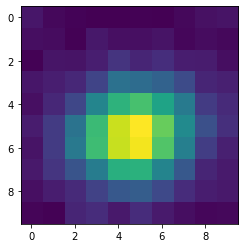

In [56]:
plt.imshow(fr.sc.stamps[0].array)

In [77]:
class Shear(object):
    def __init__(self, canvas, image_epsf, maskmap, pixel_scale):
        self.canvas = canvas.copy()
        self.image_epsf = galsim.ImageF(image_epsf, wcs=galsim.PixelScale(pixel_scale))
        self.BADVAL = -9999
        self.maskmap = galsim.ImageF(maskmap, wcs=galsim.PixelScale(pixel_scale)).copy()
        self.pixel_scale = pixel_scale

    def extract_stamps(self, centers, imasks, sizes):

        self.stamps = []
        self.masks = []
        for i in np.arange(len(centers)):
            half_size = sizes[i] // 2 + 2
            cen = centers[i]
            bb = galsim.bounds.BoundsI(np.round(cen[0]) - half_size,
                                       np.round(cen[0]) + half_size - 1,
                                       np.round(cen[1]) - half_size,
                                       np.round(cen[1]) + half_size - 1)
            
            stamp = self.canvas[bb].array.copy()
            mask = self.maskmap[bb].array.copy()
            mm = (mask != imasks[i]) & (mask != 0)
            muniques = np.unique(mask)
            stamp[mm] = 0
            mask[mm] = 0
            
            self.masks.append(self.maskmap[bb].array.copy())
            self.stamps.append(galsim.ImageF(stamp, wcs=galsim.PixelScale(self.pixel_scale)))


    def estimate_shear(self, sky_var=0, shear_est="KSB"):
        """
        shear modes = REGAUSS’, ‘LINEAR’, ‘BJ’, or ‘KSB’
        which is raw or canvas, default to canvas
        """

        #         stamps = self.raw_stamps
        #if which == "canvas":
        stamps = self.stamps

        self.logs = []
        self.shears = []
        self.success = []
        self.fluxes = []
        self.shears_error = []
        for i, im in enumerate(stamps):
            try:
                res = galsim.hsm.EstimateShear(im, self.image_epsf, shear_est=shear_est, sky_var=sky_var)
#                 print(res)
                self.logs.append(res)
                self.success.append(True)

                tmp = np.array([res.corrected_g1, res.corrected_g2])

                self.shears.append(tmp)
                self.fluxes.append(res.moments_amp * (self.pixel_scale)**2)
                self.shears_error.append(res.corrected_shape_err)
#                             print("here")
            except:
                self.success.append(False)
                self.logs.append(None)
                self.fluxes.append(None)
                tmp = np.array([self.BADVAL, self.BADVAL])
                self.shears.append(tmp)
                self.shears_error.append(None)



        self.fluxes = np.array(self.fluxes)
        self.shears = np.array(self.shears)
        self.success = np.array(self.success)
        self.shears_error = np.array(self.shears_error)

In [73]:
res = galsim.hsm.EstimateShear(sc.stamps[0], sc.image_epsf, shear_est="KSB", sky_var=0.001)


In [75]:
sc = Shear(fr.canvas, fr.epsf, fr.seg)
sc.extract_stamps(fr.cens, imasks=fr.ids, sizes=fr.sizes)
sc.estimate_shear(sky_var=fr.noise_std**2)

In [76]:
sc.shears

array([[ 0.33632895, -0.1913631 ],
       [-0.03445783, -0.1663015 ],
       [ 0.28615323, -0.20039244],
       ...,
       [ 0.02730563, -0.08761913],
       [ 0.30386567, -0.21743409],
       [ 0.17992949, -0.04801388]])

In [5]:
df = render.DrawField(5000, catalog, band="i")
df.prepare()
df.make_infodicts()
df.multi_render(100)
df.collate_stamps()

starting xshear calculations in 100 processes


In [6]:
noise_std = 8.36335 
noise = np.random.normal(scale=noise_std, size=(5000, 5000))

In [7]:
arr = df.canvas.array + noise
#arr = arr[2100:2900, 2100:2900]
fio.write("test.fits", arr, clobber=True)